## Statements:
>the more subscribers the higher the rating

>rating rating might always be higher in some of the categories




# Import Essential Libraries

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Data Preparation

In [3]:
# Import the dataset -  Udemy Courses
rawcoursedata = pd.read_csv('../../Course_info.csv')
#select equired columns
SubCatPaid_raw = pd.DataFrame(rawcoursedata[['avg_rating','num_subscribers','subcategory','price','category']][rawcoursedata['price'] != 0])
# Convert all Variable Names to UPPERCASE
SubCatPaid_raw.columns = SubCatPaid_raw.columns.str.upper()
# To add suicide_rate column for prediction ('High' and 'Low')
#SubCatPaid_raw['AVG_RATING'] = np.where(SubCatPaid_raw['AVG_RATING']>4, 'High', 'Low')
SubCatPaid_raw

,AVG_RATING,NUM_SUBSCRIBERS,SUBCATEGORY,PRICE,CATEGORY
0,3.75000,2231,Food & Beverage,24.99,Lifestyle
2,4.40000,1713,Other Lifestyle,19.99,Lifestyle
3,4.80000,4988,Pet Care & Training,199.99,Lifestyle
4,4.75000,1266,Web Design,159.99,Design
5,4.53012,20505,Yoga,29.99,Health & Fitness
...,...,...,...,...,...
209729,0.00000,3,Language Learning,19.99,Teaching & Academics
209730,0.00000,0,IT Certifications,49.99,IT & Software
209731,0.00000,0,IT Certifications,49.99,IT & Software
209732,0.00000,0,Other Finance & Accounting,119.99,Finance & Accounting


### remove outliers

<class 'str'>, NUM_SUBSCRIBERS => 20.0, 1065.0
[NUM_SUBSCRIBERS] total outliers: 28237
<class 'str'>, PRICE => 19.99, 109.99
[PRICE] total outliers: 10888


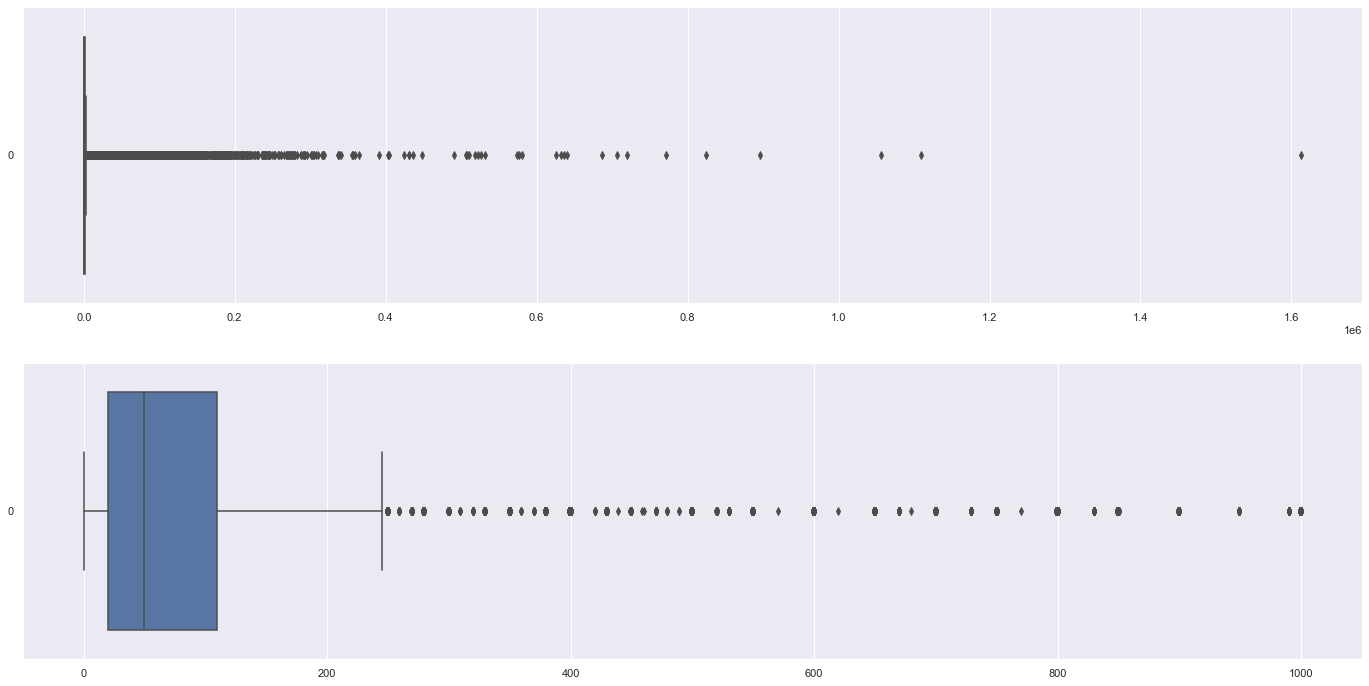

In [4]:
    f, axes = plt.subplots(2, 1, figsize=(24, 12))
    # Draw the Boxplots 
    sb.boxplot(data = SubCatPaid_raw.NUM_SUBSCRIBERS, orient = "h", ax = axes[0])
    sb.boxplot(data = SubCatPaid_raw.PRICE, orient = "h", ax = axes[1])

    column= 'NUM_SUBSCRIBERS'
    column_data: pd.DataFrame = SubCatPaid_raw[column]
    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)
    interquartile_range = q3-q1
    print(f"{type(column)}, {column} => {q1}, {q3}")
    lower_whisker = q1-1.5*interquartile_range
    upper_whisker = q3+1.5*interquartile_range
    outliers = sum( (column_data < lower_whisker) | (column_data > upper_whisker) )
    print(f"[{column}] total outliers: { outliers }")
    
    column= 'PRICE'
    column_data: pd.DataFrame = SubCatPaid_raw[column]
    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)
    interquartile_range = q3-q1
    print(f"{type(column)}, {column} => {q1}, {q3}")
    lower_whisker = q1-1.5*interquartile_range
    upper_whisker = q3+1.5*interquartile_range
    outliers = sum( (column_data < lower_whisker) | (column_data > upper_whisker) )
    print(f"[{column}] total outliers: { outliers }")
    

In [5]:
q1 = SubCatPaid_raw.quantile(0.25)
q3 = SubCatPaid_raw.quantile(0.75)
interquartile_range = q3-q1

lower_whisker = q1-1.5*interquartile_range
upper_whisker = q3+1.5*interquartile_range

outliers = ((SubCatPaid_raw < lower_whisker) | (SubCatPaid_raw > upper_whisker)).any(axis=1)
SubCatPaid_cleanup: pd.DataFrame = SubCatPaid_raw[~outliers]
print(f"Union outliers: {sum(outliers)}")
SubCatPaid_cleanup.head

Union outliers: 64558


<bound method NDFrame.head of         AVG_RATING  NUM_SUBSCRIBERS                 SUBCATEGORY   PRICE  \
0         3.750000             2231             Food & Beverage   24.99   
2         4.400000             1713             Other Lifestyle   19.99   
4         4.750000             1266                  Web Design  159.99   
9         4.650000              483  Search Engine Optimization   99.99   
10        4.100000              794            Teacher Training   49.99   
...            ...              ...                         ...     ...   
209706    5.000000               14     Religion & Spirituality   24.99   
209711    4.650000              206      Social Media Marketing   34.99   
209719    4.214286             2009            Entrepreneurship   84.99   
209723    5.000000              321               Mental Health   19.99   
209725    5.000000               11          Esoteric Practices   69.99   

                    CATEGORY  
0                  Lifestyle  
2      

In [6]:
SubCatPaid_cleanup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123438 entries, 0 to 209725
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AVG_RATING       123438 non-null  float64
 1   NUM_SUBSCRIBERS  123438 non-null  int64  
 2   SUBCATEGORY      123438 non-null  object 
 3   PRICE            123438 non-null  float64
 4   CATEGORY         123438 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 5.7+ MB


# LR

In [7]:
# Import the necessary libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
master_cat = SubCatPaid_cleanup['CATEGORY']

ohe.fit(master_cat.values.reshape(-1, 1))
master_cat_ohe = pd.DataFrame(ohe.transform(master_cat.values.reshape(-1, 1)).toarray()
                                ,columns=ohe.get_feature_names([master_cat.name]))

# Check the encoded variables
master_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123438 entries, 0 to 123437
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CATEGORY_Business              123438 non-null  float64
 1   CATEGORY_Design                123438 non-null  float64
 2   CATEGORY_Development           123438 non-null  float64
 3   CATEGORY_Finance & Accounting  123438 non-null  float64
 4   CATEGORY_Health & Fitness      123438 non-null  float64
 5   CATEGORY_IT & Software         123438 non-null  float64
 6   CATEGORY_Lifestyle             123438 non-null  float64
 7   CATEGORY_Marketing             123438 non-null  float64
 8   CATEGORY_Music                 123438 non-null  float64
 9   CATEGORY_Office Productivity   123438 non-null  float64
 10  CATEGORY_Personal Development  123438 non-null  float64
 11  CATEGORY_Photography & Video   123438 non-null  float64
 12  CATEGORY_Teaching & Academics 

In [8]:
# Combining Numeric features with the OHE Categorical features
masterdata_num = SubCatPaid_cleanup[['NUM_SUBSCRIBERS']]
masterdata_res = SubCatPaid_cleanup[['AVG_RATING']]
masterdata_ohe = pd.concat([masterdata_num, master_cat_ohe, masterdata_res], 
                           sort = False, axis = 1).reindex(index=masterdata_num.index)

# Check the final dataframe
masterdata_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123438 entries, 0 to 209725
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   NUM_SUBSCRIBERS                123438 non-null  float64
 1   CATEGORY_Business              76887 non-null   float64
 2   CATEGORY_Design                76887 non-null   float64
 3   CATEGORY_Development           76887 non-null   float64
 4   CATEGORY_Finance & Accounting  76887 non-null   float64
 5   CATEGORY_Health & Fitness      76887 non-null   float64
 6   CATEGORY_IT & Software         76887 non-null   float64
 7   CATEGORY_Lifestyle             76887 non-null   float64
 8   CATEGORY_Marketing             76887 non-null   float64
 9   CATEGORY_Music                 76887 non-null   float64
 10  CATEGORY_Office Productivity   76887 non-null   float64
 11  CATEGORY_Personal Development  76887 non-null   float64
 12  CATEGORY_Photography & Video  

In [17]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
#y = pd.DataFrame(masterdata_ohe['AVG_RATING'])
#X = pd.DataFrame(masterdata_ohe[['CATEGORY','NUM_SUBSCRIBERS']])

# Split the Dataset into random Train and Test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
#print("Train Set :", X_train.shape, y_train.shape)
#print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
#linreg = LinearRegression()

# Train the Linear Regression model
#linreg.fit(X_train, y_train)

In [18]:
# Import the necessary libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Extract the 'CATEGORY' column
master_cat = SubCatPaid_cleanup[['CATEGORY']]

# OneHotEncoding of categorical predictors (not the response)
cat_col = ['CATEGORY']
num_col = ['NUM_SUBSCRIBERS']
ct = ColumnTransformer(
    [("onehot", OneHotEncoder(), cat_col)],
    remainder="passthrough")

# Create a pipeline to combine the ColumnTransformer and Linear Regression objects
pipe = Pipeline([
    ('transformer', ct),
    ('estimator', LinearRegression())
])

# Extract Response and Predictors
y = pd.DataFrame(SubCatPaid_cleanup['AVG_RATING'])
X = pd.DataFrame(SubCatPaid_cleanup[['CATEGORY', 'NUM_SUBSCRIBERS']])

# Reset the index of the 'SubCatPaid_cleanup' DataFrame
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the Linear Regression model using the pipeline
pipe.fit(X_train, y_train)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)


Train Set : (98750, 2) (98750, 1)
Test Set  : (24688, 2) (24688, 1)


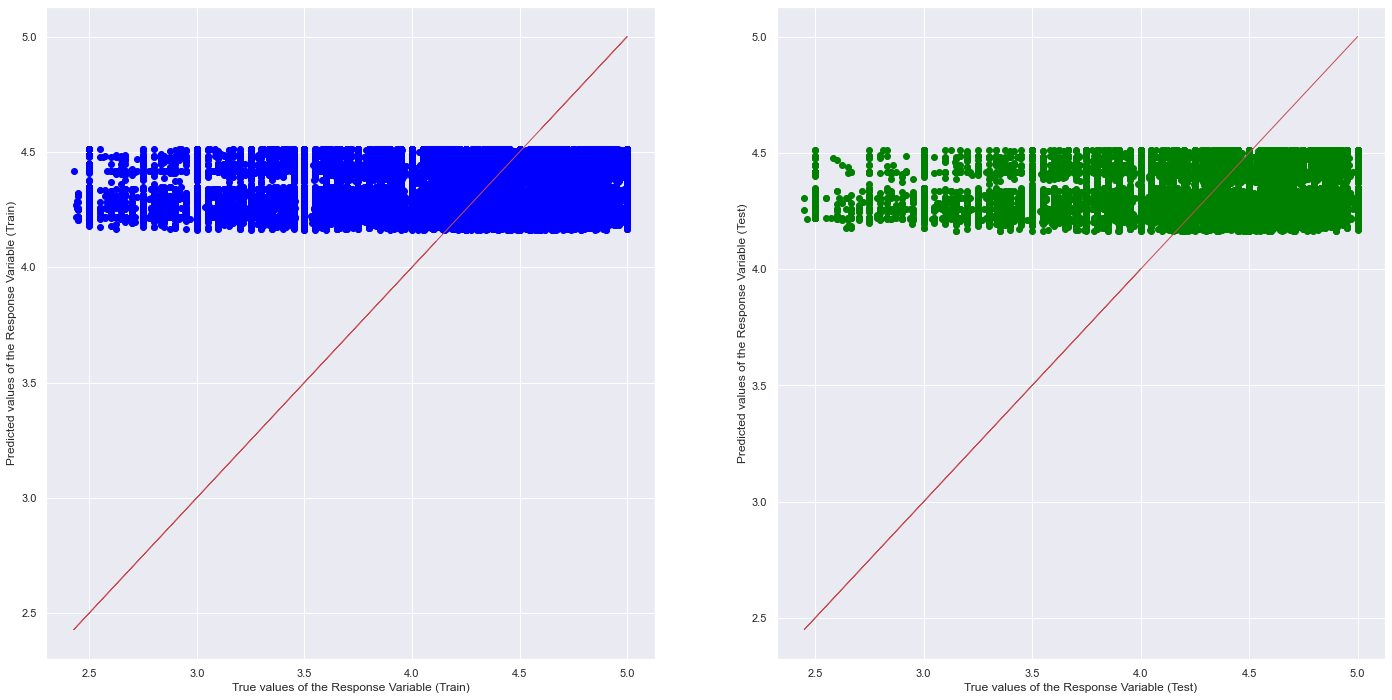

Explained Variance (R^2) on Train Set 	: 0.03778237645420557


NameError: name 'mean_squared_error' is not defined

In [22]:
# Predict avr rating corresponding to Predictors
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()
print("Explained Variance (R^2) on Train Set \t:", pipe.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))